In [4]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [5]:
#Loading the dataset

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('C:/Users/harsh/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

testset = datasets.FashionMNIST('C:/Users/harsh/.pytorch/F_MNIST_data/',download=True,train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset,shuffle=True,batch_size=64)

In [22]:
#Hyperparameters and model architecture

input_features = 784
hidden_units = [128,64,32,10]
learning_rate = 0.003
epoch = 20

model = nn.Sequential(nn.Linear(input_features,hidden_units[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_units[0],hidden_units[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_units[1],hidden_units[2]),
                     nn.ReLU(),
                     nn.Linear(hidden_units[2],hidden_units[3]),
                     nn.LogSoftmax(dim=1))
model = model.cuda()

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [19]:
def run_testset():
    total_test = 0
    correct = 0
    for test_images, test_labels in testloader:
        test_images = test_images.view(test_images.shape[0],-1)
        test_images = test_images.cuda()
        test_labels = test_labels.cuda()

        total_test += len(test_labels)
        with torch.no_grad():
            logits = model(test_images)
            loss = criterion(logits, test_labels)
            _, predictions = torch.max(logits,1)
            correct += (predictions == test_labels).sum().item()
    return (correct/(total_test*1.0), loss)

Training Loss at epoch 1 is 2.2619402408599854 and Test Loss is 2.147155284881592
Training Loss at epoch 2 is 1.8052126169204712 and Test Loss is 1.3882743120193481
Training Loss at epoch 3 is 1.008415937423706 and Test Loss is 0.8025654554367065
Training Loss at epoch 4 is 0.7596242427825928 and Test Loss is 1.119146466255188
Training Loss at epoch 5 is 0.6529556512832642 and Test Loss is 0.4088863134384155
Training Loss at epoch 6 is 0.5981671214103699 and Test Loss is 0.529026985168457
Training Loss at epoch 7 is 0.56087327003479 and Test Loss is 0.16259801387786865
Training Loss at epoch 8 is 0.5331131815910339 and Test Loss is 0.3256964385509491
Training Loss at epoch 9 is 0.512169599533081 and Test Loss is 0.4408491849899292
Training Loss at epoch 10 is 0.4944556951522827 and Test Loss is 0.212660551071167
Training Loss at epoch 11 is 0.4805067479610443 and Test Loss is 0.47405052185058594
Training Loss at epoch 12 is 0.4677165150642395 and Test Loss is 0.8137688636779785
Trainin

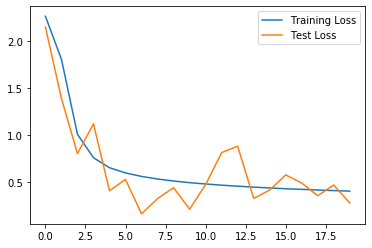

Accuracy on test set is 0.8431


In [23]:
#Model training

all_losses = []
test_loss = []

for ep in range(epoch):
    total_loss = 0
    
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits,labels)
        loss.backward()
        optimizer.step()
        total_loss += loss
    
    test_accu, loss_test = run_testset()
    all_losses.append(total_loss/len(trainloader))
    test_loss.append(loss_test)
    print('Training Loss at epoch {} is {} and Test Loss is {}'.format(ep+1,total_loss/len(trainloader), loss_test))

    
plt.plot(all_losses,label = 'Training Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()
    
print('Accuracy on test set is {}'.format(run_testset()[0]))